In [243]:
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

In [244]:
from static_grader import grader

# DW Miniproject
## Introduction

The objective of this miniproject is to exercise your ability to wrangle tabular data set and aggregate large data sets into meaningful summary statistics. We will be working with the same medical data used in the `pw` miniproject, but will be leveraging the power of Pandas to more efficiently represent and act on our data.

## Downloading the data

We first need to download the data we'll be using from Amazon S3:

In [3]:
!mkdir dw-data
!wget http://dataincubator-wqu.s3.amazonaws.com/dwdata/201701scripts_sample.csv.gz -nc -P ./dw-data/
!wget http://dataincubator-wqu.s3.amazonaws.com/dwdata/201606scripts_sample.csv.gz -nc -P ./dw-data/
!wget http://dataincubator-wqu.s3.amazonaws.com/dwdata/practices.csv.gz -nc -P ./dw-data/
!wget http://dataincubator-wqu.s3.amazonaws.com/dwdata/chem.csv.gz -nc -P ./dw-data/

mkdir: cannot create directory ‘dw-data’: File exists
File ‘./dw-data/201701scripts_sample.csv.gz’ already there; not retrieving.

File ‘./dw-data/201606scripts_sample.csv.gz’ already there; not retrieving.

File ‘./dw-data/practices.csv.gz’ already there; not retrieving.

File ‘./dw-data/chem.csv.gz’ already there; not retrieving.



## Loading the data

Similar to the `PW` miniproject, the first step is to read in the data. The data files are stored as compressed CSV files. You can load the data into a Pandas DataFrame by making use of the `gzip` package to decompress the files and Panda's `read_csv` methods to parse the data into a DataFrame. You may want to check the Pandas documentation for parsing [CSV](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) files for reference.

For a description of the data set please, refer to the [PW miniproject](./pw.ipynb). **Note that all questions make use of the 2017 data only, except for Question 5 which makes use of both the 2017 and 2016 data.**

In [245]:
import pandas as pd
import numpy as np
import gzip

In [246]:
!ls

dw-Copy1.ipynb	dw-data   in-Copy1.ipynb  pw-Copy1.ipynb  pw.ipynb
dw-Copy2.ipynb	dw.ipynb  in.ipynb	  pw-data


In [247]:
# load the 2017 data
scripts = pd.read_csv('dw-data/201701scripts_sample.csv.gz')
scripts.head()

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity
0,N85639,0106020C0,Bisacodyl_Tab E/C 5mg,1,0.39,0.47,12
1,N85639,0106040M0,Movicol Plain_Paed Pdr Sach 6.9g,1,4.38,4.07,30
2,N85639,0301011R0,Salbutamol_Inha 100mcg (200 D) CFF,1,1.50,1.40,1
3,N85639,0304010G0,Chlorphenamine Mal_Oral Soln 2mg/5ml,1,2.62,2.44,150
4,N85639,0401020K0,Diazepam_Tab 2mg,1,0.16,0.26,6


In [249]:
col_names=[ 'code', 'name', 'addr_1', 'addr_2', 'borough', 'village', 'post_code']
practices = pd.read_csv('dw-data/practices.csv.gz', names=col_names)
practices.head()

,code,name,addr_1,addr_2,borough,village,post_code
0,A81001,THE DENSHAM SURGERY,THE HEALTH CENTRE,LAWSON STREET,STOCKTON ON TEES,CLEVELAND,TS18 1HU
1,A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AW
2,A81003,VICTORIA MEDICAL PRACTICE,THE HEALTH CENTRE,VICTORIA ROAD,HARTLEPOOL,CLEVELAND,TS26 8DB
3,A81004,WOODLANDS ROAD SURGERY,6 WOODLANDS ROAD,NaN,MIDDLESBROUGH,CLEVELAND,TS1 3BE
4,A81005,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,NaN,TS14 7DJ


In [250]:
chem = pd.read_csv('dw-data/chem.csv.gz')
chem.head()

,CHEM SUB,NAME
0,0101010A0,Alexitol Sodium
1,0101010B0,Almasilate
2,0101010C0,Aluminium Hydroxide
3,0101010D0,Aluminium Hydroxide With Magnesium
4,0101010E0,Hydrotalcite


Now that we've loaded in the data, let's first replicate our results from the `PW` miniproject. Note that we are now working with a larger data set so the answers will be different than in the `PW` miniproject even if the analysis is the same.

## Question 1: summary_statistics

In the `PW` miniproject we first calculated the total, mean, standard deviation, and quartile statistics of the `'items'`, `'quantity'`', `'nic'`, and `'act_cost'` fields. To do this we had to write some functions to calculate the statistics and apply the functions to our data structure. The DataFrame has a `describe` method that will calculate most (not all) of these things for us.

Submit the summary statistics to the grader as a list of tuples: [('act_cost', (total, mean, std, q25, median, q75)), ...]

In [9]:
# target = total, mean, standard deviation, quartile statistics ()
stats = scripts.describe()
stats

,items,nic,act_cost,quantity
count,973193.000000,973193.000000,973193.000000,973193.000000
mean,9.133136,73.058915,67.986613,741.329835
std,29.204198,188.070257,174.401703,3665.426958
min,1.000000,0.000000,0.040000,0.000000
25%,1.000000,7.800000,7.330000,28.000000
50%,2.000000,22.640000,21.220000,100.000000
75%,6.000000,65.000000,60.670000,350.000000
max,2384.000000,16320.000000,15108.320000,577720.000000


In [10]:
stats['items']['mean']

9.133135976111625

In [11]:
fields = ['items', 'quantity', 'nic', 'act_cost']
print(sum(scripts['items']))
print(sum(scripts['quantity']))
print(sum(scripts['nic']))
print(sum(scripts['act_cost']))

8888304
721457006
71100424.84000827
66164096.11999956


In [30]:
# order of stats ('act_cost', (total, mean, std, q25, median, q75)
# summary_stats = [('items', (0,)* 6), ('quantity', (0,) * 6), ('nic', (0,) * 6), ('act_cost', (0,) * 6)]

fields = ['items', 'quantity', 'nic', 'act_cost']
summary_stats = []

for field in fields:
    stats[field]
    field_stats = (field,
                   (sum(scripts[field]),
                    stats[field]['mean'],
                    stats[field]['std'],
                    stats[field]['25%'],
                    stats[field]['50%'],
                    stats[field]['75%']))
    summary_stats.append(field_stats)
    


In [31]:
# order of stats ('act_cost', (total, mean, std, q25, median, q75)
fields = ['items', 'quantity', 'nic', 'act_cost']
summary_stats = [
    (field, (sum(scripts[field]),
             stats[field]['mean'],
             stats[field]['std'],
             stats[field]['25%'],
             stats[field]['50%'],
             stats[field]['75%']))
    for field in fields]
    


In [32]:
grader.score.dw__summary_statistics(summary_stats)

Your score:  1.0


## Question 2: most_common_item

We can also easily compute summary statistics on groups within the data. In the `pw` miniproject we had to explicitly construct the groups based on the values of a particular field. Pandas will handle that for us via the `groupby` method. This process is [detailed in the Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/groupby.html).

Use `groupby` to calculate the total number of items dispensed for each `'bnf_name'`. Find the item with the highest total and return the result as `[(bnf_name, total)]`.

In [9]:
total_by_bnf = scripts.groupby('bnf_name').items.sum()

max_item = ['', 0]

group_keys = total_by_bnf.index

for bnf_name in group_keys:
    if total_by_bnf[bnf_name] > max_item[1]:
        max_item[0] = bnf_name
        max_item[1] = total_by_bnf[bnf_name]
        
max_item

['Omeprazole_Cap E/C 20mg', 218583]

In [10]:
total_by_bnf.head()

bnf_name
365 Film 10cm x 12cm VP Adh Film Dress      2
365 Non Adherent 10cm x 10cm Pfa Plas Fa    3
365 Non Adherent 10cm x 20cm Pfa Plas Fa    1
365 Non Woven Island 8cm x 10cm Adh Dres    1
365 Transpt Island 5cm x 7.2cm VP Adh Fi    2
Name: items, dtype: int64

In [11]:
# total_by_bnf.index
total_by_bnf.keys()

Index(['365 Film 10cm x 12cm VP Adh Film Dress',
       '365 Non Adherent 10cm x 10cm Pfa Plas Fa',
       '365 Non Adherent 10cm x 20cm Pfa Plas Fa',
       '365 Non Woven Island 8cm x 10cm Adh Dres',
       '365 Transpt Island 5cm x 7.2cm VP Adh Fi',
       '365 Transpt Island 8.5cm x 15.5cm VP Adh',
       '3M Micropore Silicone 2.5cm x 5m Surg Ad',
       '3M Micropore Silicone 5cm x 5m Surg Adh',
       '3m Health Care_Cavilon Durable Barrier C',
       '3m Health Care_Cavilon No Sting 1ml Barr',
       ...
       'kliniderm Foam Slc Sacrum Border 18cmx18',
       'kliniderm superabsorbent 10cm x 10cm Pfa',
       'kliniderm superabsorbent 10cm x 15cm Pfa',
       'kliniderm superabsorbent 20cm x 20cm Pfa',
       'kliniderm superabsorbent 20cm x 30cm Pfa',
       'nSpire PiKo-1 Stnd Range Peak Flow Meter',
       'nSpire Pocket Peak Low Range Peak Flow M',
       'nSpire Pocket Peak Stnd Range Peak Flow',
       'oraNurse_Toothpaste Orig (1450ppm)', 'palmdoc (Reagent)_Strips'],
 

In [12]:
most_common_item = [tuple(max_item)]
most_common_item

[('Omeprazole_Cap E/C 20mg', 218583)]

In [13]:
most_common_item = [(key, total_by_bnf[key]) for key in total_by_bnf.keys() if total_by_bnf[key] == total_by_bnf.max()]

In [14]:
most_common_item

[('Omeprazole_Cap E/C 20mg', 218583)]

In [15]:
max_item = total_by_bnf.idxmax()
most_common_item = [(max_item, total_by_bnf[max_item])]


In [16]:
print(most_common_item)

[('Omeprazole_Cap E/C 20mg', 218583)]


In [17]:
grader.score.dw__most_common_item(most_common_item)

Your score:  1.0


## Question 3: items_by_region

Now let's find the most common item by post code. The post code information is in the `practices` DataFrame, and we'll need to `merge` it into the `scripts` DataFrame. Pandas provides [extensive documentation](https://pandas.pydata.org/pandas-docs/stable/merging.html) with diagrammed examples on different methods and approaches for joining data. The `merge` method is only one of many possible options.

Return your results as a list of tuples `(post code, item name, amount dispensed as % of total)`. Sort your results ascending alphabetically by post code and take only results from the first 100 post codes.

**NOTE:** Some practices have multiple postal codes associated with them. Use the alphabetically first postal code. Note some postal codes may have multiple `'bnf_name'` with the same prescription rate for the maximum. In this case, take the alphabetically first `'bnf_name'` (as in the PW miniproject).

In [9]:
practice_codes = practices['code']
print(practice_codes.shape)
print(practice_codes.head())


(12020,)
0    A81001
1    A81002
2    A81003
3    A81004
4    A81005
Name: code, dtype: object


In [10]:
unique_practices = practices.sort_values('post_code').groupby('code').first().reset_index()
print(unique_practices.shape)
unique_practices.head()

(10843, 7)


,code,name,addr_1,addr_2,borough,village,post_code
0,A81001,THE DENSHAM SURGERY,THE HEALTH CENTRE,LAWSON STREET,STOCKTON ON TEES,CLEVELAND,TS18 1HU
1,A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AW
2,A81003,VICTORIA MEDICAL PRACTICE,MCKENZIE HOUSE,17 KENDAL ROAD,HARTLEPOOL,CLEVELAND,TS25 1QU
3,A81004,WOODLANDS ROAD SURGERY,6 WOODLANDS ROAD,ACKLAM,MIDDLESBROUGH,CLEVELAND,TS1 3BE
4,A81005,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,NaN,TS14 7DJ


In [11]:
joined = scripts.merge(unique_practices[['code', 'post_code']], how='right', left_on='practice', right_on='code')

In [12]:
joined.tail()

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,code,post_code
983175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y05758,WN8 6LJ
983176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y05762,SW20 8DA
983177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y05763,CB6 1DN
983178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y05764,PE11 3PB
983179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y05771,HA1 3UJ


In [13]:
joined.head()

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,code,post_code
0,N85639,0106020C0,Bisacodyl_Tab E/C 5mg,1.0,0.39,0.47,12.0,N85639,CH44 5UF
1,N85639,0106040M0,Movicol Plain_Paed Pdr Sach 6.9g,1.0,4.38,4.07,30.0,N85639,CH44 5UF
2,N85639,0301011R0,Salbutamol_Inha 100mcg (200 D) CFF,1.0,1.50,1.40,1.0,N85639,CH44 5UF
3,N85639,0304010G0,Chlorphenamine Mal_Oral Soln 2mg/5ml,1.0,2.62,2.44,150.0,N85639,CH44 5UF
4,N85639,0401020K0,Diazepam_Tab 2mg,1.0,0.16,0.26,6.0,N85639,CH44 5UF


In [14]:
 total_item_by_postal = joined.groupby(['post_code'])['items'].sum()  #['items'].sum().reset_index())
total_item_by_postal.shape

(8137,)

In [15]:
total_item_by_postal_with_null = total_item_by_postal[total_item_by_postal.isnull()]
total_item_by_postal_with_null.shape

(7878,)

In [16]:
total_item_by_postal = total_item_by_postal[total_item_by_postal.notnull()]
total_item_by_postal.shape

(259,)

In [17]:
total_item_by_postal[total_item_by_postal.isnull()].shape


(0,)

In [18]:
print(total_item_by_postal.min())
print(total_item_by_postal.max())
total_item_by_postal.reset_index().head()

5379.0
112283.0


,post_code,items
0,B11 4BW,22731.0
1,B12 9LP,17073.0
2,B18 7AL,20508.0
3,B21 9RY,31027.0
4,B23 6DJ,28011.0


In [19]:
total_item_by_postal.idxmax()

'SK11 6JL'

In [20]:
total_by_bnf_post = (joined.groupby(['post_code', 'bnf_name'])['items'].sum().reset_index())

In [21]:
total_by_bnf_post.head()


,post_code,bnf_name,items
0,B11 4BW,3m Health Care_Cavilon Durable Barrier C,7.0
1,B11 4BW,3m Health Care_Cavilon No Sting Barrier,2.0
2,B11 4BW,Abasaglar KwikPen_100u/ml 3ml Pf Pen,2.0
3,B11 4BW,Abidec_Dps,63.0
4,B11 4BW,Able Spacer + Sml/Med Mask,1.0


In [22]:
postal_total = total_by_bnf_post.groupby('post_code')['items'].sum()
postal_total.head()

post_code
B11 4BW    22731.0
B12 9LP    17073.0
B18 7AL    20508.0
B21 9RY    31027.0
B23 6DJ    28011.0
Name: items, dtype: float64

In [23]:
total_by_bnf_post['proportion'] = [
    item/postal_total[post_code]
    for post_code, item in 
    zip(total_by_bnf_post['post_code'],
        total_by_bnf_post['items'])
]




In [24]:
max_mask = total_by_bnf_post.groupby('post_code')['items'].idxmax()

max_by_bnf_post = total_by_bnf_post.loc[max_mask]


In [25]:
max_by_bnf_post.head()

,post_code,bnf_name,items,proportion
1628,B11 4BW,Salbutamol_Inha 100mcg (200 D) CFF,706.0,0.031059
3323,B12 9LP,Paracet_Tab 500mg,425.0,0.024893
5293,B18 7AL,Salbutamol_Inha 100mcg (200 D) CFF,556.0,0.027111
6924,B21 9RY,Metformin HCl_Tab 500mg,1033.0,0.033294
9096,B23 6DJ,Lansoprazole_Cap 30mg (E/C Gran),599.0,0.021384


In [26]:
max_by_bnf_post['proportion'] = [
    item/postal_total[post_code]
    for post_code, item in 
    zip(max_by_bnf_post['post_code'], max_by_bnf_post['items'])]




In [27]:
max_by_bnf_post.head()

,post_code,bnf_name,items,proportion
1628,B11 4BW,Salbutamol_Inha 100mcg (200 D) CFF,706.0,0.031059
3323,B12 9LP,Paracet_Tab 500mg,425.0,0.024893
5293,B18 7AL,Salbutamol_Inha 100mcg (200 D) CFF,556.0,0.027111
6924,B21 9RY,Metformin HCl_Tab 500mg,1033.0,0.033294
9096,B23 6DJ,Lansoprazole_Cap 30mg (E/C Gran),599.0,0.021384


In [28]:
total_by_bnf_post.head()

,post_code,bnf_name,items,proportion
0,B11 4BW,3m Health Care_Cavilon Durable Barrier C,7.0,0.000308
1,B11 4BW,3m Health Care_Cavilon No Sting Barrier,2.0,0.000088
2,B11 4BW,Abasaglar KwikPen_100u/ml 3ml Pf Pen,2.0,0.000088
3,B11 4BW,Abidec_Dps,63.0,0.002772
4,B11 4BW,Able Spacer + Sml/Med Mask,1.0,0.000044


In [29]:
total_by_bnf_post[
    (total_by_bnf_post['post_code'] == 'B11 4BW') &
    (total_by_bnf_post['bnf_name'] == 
     "Salbutamol_Inha 100mcg (200 D) CFF")
]

,post_code,bnf_name,items,proportion
1628,B11 4BW,Salbutamol_Inha 100mcg (200 D) CFF,706.0,0.031059


In [30]:
# total_by_bnf_post = total_by_bnf_post.sort_values('bnf_name')
# total_by_bnf_post = total_by_bnf_post.sort_values('post_code')
# total_by_bnf_post.head()

In [31]:
# items_by_region = [("B11 4BW", "Salbutamol_Inha 100mcg (200 D) CFF", 0.0310589063)] * 100

In [32]:
# items_by_region = [
#     (post_code, bnf_name, proportion) 
#     for post_code, bnf_name, proportion in 
#     zip(total_by_bnf_post['post_code'], 
#     total_by_bnf_post['bnf_name'], 
#     total_by_bnf_post['proportion'])][:100]


In [33]:
items_by_region = [
    (post_code, bnf_name, proportion) 
    for post_code, bnf_name, proportion in 
    zip(max_by_bnf_post['post_code'], 
        max_by_bnf_post['bnf_name'],
        max_by_bnf_post['proportion'])
]



In [34]:
items_by_region = items_by_region[:100]

In [35]:
items_by_region = list(zip(
    max_by_bnf_post['post_code'], 
    max_by_bnf_post['bnf_name'],
    max_by_bnf_post['proportion']))[:100]

In [38]:
grader.score.dw__items_by_region(items_by_region)

Your score:  1.0


## Question 4: script_anomalies

Drug abuse is a source of human and monetary costs in health care. A first step in identifying practitioners that enable drug abuse is to look for practices where commonly abused drugs are prescribed unusually often. Let's try to find practices that prescribe an unusually high amount of opioids. The opioids we'll look for are given in the list below.

In [10]:
practices.head()

,code,name,addr_1,addr_2,borough,village,post_code
0,A81001,THE DENSHAM SURGERY,THE HEALTH CENTRE,LAWSON STREET,STOCKTON ON TEES,CLEVELAND,TS18 1HU
1,A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AW
2,A81003,VICTORIA MEDICAL PRACTICE,THE HEALTH CENTRE,VICTORIA ROAD,HARTLEPOOL,CLEVELAND,TS26 8DB
3,A81004,WOODLANDS ROAD SURGERY,6 WOODLANDS ROAD,NaN,MIDDLESBROUGH,CLEVELAND,TS1 3BE
4,A81005,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,NaN,TS14 7DJ


In [11]:
print(chem.shape)
chem.head()

(3487, 2)


,CHEM SUB,NAME
0,0101010A0,Alexitol Sodium
1,0101010B0,Almasilate
2,0101010C0,Aluminium Hydroxide
3,0101010D0,Aluminium Hydroxide With Magnesium
4,0101010E0,Hydrotalcite


In [13]:
opioids = ['morphine', 'oxycodone', 'methadone', 'fentanyl', 'pethidine', 'buprenorphine', 'propoxyphene', 'codeine']

These are generic names for drugs, not brand names. Generic drug names can be found using the `'bnf_code'` field in `scripts` along with the `chem` table.. Use the list of opioids provided above along with these fields to make a new field in the `scripts` data that flags whether the row corresponds with a opioid prescription.

In [14]:
combined_opioids = '|'.join(opioids)
combined_opioids

'morphine|oxycodone|methadone|fentanyl|pethidine|buprenorphine|propoxyphene|codeine'

In [16]:
# # identify opioids in chems series
# chem['opioids'] = chem['NAME'].str.contains(combined_opioids, case=False).astype(int)

# chem[chem['opioids'] == 1]['opioids'].sum()

In [45]:
# script_with_opioids = scripts.merge(chem, how='right', left_on='bnf_code', right_on='CHEM SUB')

# script_with_opioids = scripts.merge(chem, how='left', left_on='bnf_code', right_on='CHEM SUB')
# script_with_opioids.head()

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,CHEM SUB,NAME,opioids
0,N85639,0106020C0,Bisacodyl_Tab E/C 5mg,1,0.39,0.47,12,0106020C0,Bisacodyl,0.0
1,N85639,0106040M0,Movicol Plain_Paed Pdr Sach 6.9g,1,4.38,4.07,30,0106040M0,Macrogol 3350,0.0
2,N85639,0301011R0,Salbutamol_Inha 100mcg (200 D) CFF,1,1.50,1.40,1,0301011R0,Salbutamol,0.0
3,N85639,0304010G0,Chlorphenamine Mal_Oral Soln 2mg/5ml,1,2.62,2.44,150,0304010G0,Chlorphenamine Maleate,0.0
4,N85639,0401020K0,Diazepam_Tab 2mg,1,0.16,0.26,6,0401020K0,Diazepam,0.0


In [46]:
script_with_opioids['opioids'].fillna(int(False), inplace=True)

Now for each practice calculate the proportion of its prescriptions containing opioids.

**Hint:** Consider the following list: `[0, 1, 1, 0, 0, 0]`. What proportion of the entries are 1s? What is the mean value?

In [47]:
opioids_per_practice = script_with_opioids.groupby('practice')['opioids'].mean()
opioids_per_practice.head()


practice
A81005    0.033135
A81007    0.043269
A81011    0.046526
A81012    0.042761
A81017    0.038122
Name: opioids, dtype: float64

In [49]:
mean_of_opioids = script_with_opioids['opioids'].mean()
# mean_of_opioids['relative'] = script_with_opioids[]
mean_of_opioids = 0.03580276471367961

How do these proportions compare to the overall opioid prescription rate? Subtract off the proportion of all prescriptions that are opioids from each practice's proportion.

In [50]:
relative_opioids_per_practice = opioids_per_practice - mean_of_opioids

relative_opioids_per_practice.head()



practice
A81005   -0.002668
A81007    0.007466
A81011    0.010724
A81012    0.006958
A81017    0.002319
Name: opioids, dtype: float64

Now that we know the difference between each practice's opioid prescription rate and the overall rate, we can identify which practices prescribe opioids at above average or below average rates. However, are the differences from the overall rate important or just random deviations? In other words, are the differences from the overall rate big or small?

To answer this question we have to quantify the difference we would typically expect between a given practice's opioid prescription rate and the overall rate. This quantity is called the **standard error**, and is related to the **standard deviation**, $\sigma$. The standard error in this case is

$$ \frac{\sigma}{\sqrt{n}} $$

where $n$ is the number of prescriptions each practice made. Calculate the standard error for each practice. Then divide `relative_opioids_per_practice` by the standard errors. We'll call the final result `opioid_scores`.

In [51]:
script_with_opioids.head()

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,CHEM SUB,NAME,opioids
0,N85639,0106020C0,Bisacodyl_Tab E/C 5mg,1,0.39,0.47,12,0106020C0,Bisacodyl,0.0
1,N85639,0106040M0,Movicol Plain_Paed Pdr Sach 6.9g,1,4.38,4.07,30,0106040M0,Macrogol 3350,0.0
2,N85639,0301011R0,Salbutamol_Inha 100mcg (200 D) CFF,1,1.50,1.40,1,0301011R0,Salbutamol,0.0
3,N85639,0304010G0,Chlorphenamine Mal_Oral Soln 2mg/5ml,1,2.62,2.44,150,0304010G0,Chlorphenamine Maleate,0.0
4,N85639,0401020K0,Diazepam_Tab 2mg,1,0.16,0.26,6,0401020K0,Diazepam,0.0


In [55]:
standard_error_per_practice = script_with_opioids[
    'opioids'].std() / np.sqrt(script_with_opioids[
    'practice'].value_counts())

standard_error_per_practice

# N83028    0.003702
# L83100    0.003733
# D81043    0.003981
# B81008    0.004033
# B81026    0.004075
# G81013    0.004093
# C84013    0.004170
# M83006    0.004183

N83028    0.003481
L83100    0.003510
D81043    0.003744
B81008    0.003793
B81026    0.003832
G81013    0.003849
C84013    0.003921
M83006    0.003934
A81034    0.003951
P81123    0.003955
D83012    0.003964
J81041    0.003977
P81681    0.003981
A81017    0.004004
P81072    0.004006
Y03079    0.004006
B86016    0.004026
M84012    0.004063
P81100    0.004067
G82126    0.004079
G82020    0.004082
N81062    0.004091
P85013    0.004096
M85033    0.004113
E82124    0.004120
K83051    0.004128
P81140    0.004131
P89015    0.004134
C85022    0.004137
H85653    0.004142
            ...   
Y05269    0.065663
Y01852    0.070197
Y02947    0.070197
Y04080    0.070197
Y00908    0.070197
Y05488    0.075821
Y00828    0.075821
Y04147    0.083058
Y05457    0.083058
Y05320    0.083058
Y04030    0.092862
N85647    0.092862
Y03699    0.092862
Y04692    0.092862
Y01943    0.107227
N83612    0.107227
Y02318    0.107227
Y03863    0.107227
Y03408    0.107227
Y05371    0.131326
Y03006    0.131326
Y01667    0.

In [56]:
opioid_scores = relative_opioids_per_practice / standard_error_per_practice
opioid_scores.head()

A81005   -0.558089
A81007    1.534016
A81011    2.287123
A81012    1.367820
A81017    0.579112
dtype: float64

The quantity we have calculated in `opioid_scores` is called a **z-score**:

$$ \frac{\bar{X} - \mu}{\sqrt{\sigma^2/n}} $$

Here $\bar{X}$ corresponds with the proportion for each practice, $\mu$ corresponds with the proportion across all practices, $\sigma^2$ corresponds with the variance of the proportion across all practices, and $n$ is the number of prescriptions made by each practice. Notice $\bar{X}$ and $n$ will be different for each practice, while $\mu$ and $\sigma$ are determined across all prescriptions, and so are the same for every z-score. The z-score is a useful statistical tool used for hypothesis testing, finding outliers, and comparing data about different types of objects or events.

Now that we've calculated this statistic, take the 100 practices with the largest z-score. Return your result as a list of tuples in the form `(practice_name, z-score, number_of_scripts)`. Sort your tuples by z-score in descending order. Note that some practice codes will correspond with multiple names. In this case, use the first match when sorting names alphabetically.

In [57]:
top_opioids = opioid_scores.sort_values(ascending=False)[:100]

top_opioids.head()


Y01852    11.700544
Y03006     7.342009
Y03668     6.153067
G81703     5.125103
Y04997     4.960870
dtype: float64

In [58]:
top_opioids = pd.DataFrame(top_opioids.rename('z_score')).reset_index()

In [59]:
top_opioids.head()

,index,z_score
0,Y01852,11.700544
1,Y03006,7.342009
2,Y03668,6.153067
3,G81703,5.125103
4,Y04997,4.960870


In [60]:
unique_practices.head()

,code,name,addr_1,addr_2,borough,village,post_code
0,A81001,THE DENSHAM SURGERY,THE HEALTH CENTRE,LAWSON STREET,STOCKTON ON TEES,CLEVELAND,TS18 1HU
1,A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AW
2,A81003,VICTORIA MEDICAL PRACTICE,MCKENZIE HOUSE,17 KENDAL ROAD,HARTLEPOOL,CLEVELAND,TS25 1QU
3,A81004,WOODLANDS ROAD SURGERY,6 WOODLANDS ROAD,ACKLAM,MIDDLESBROUGH,CLEVELAND,TS1 3BE
4,A81005,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,NaN,TS14 7DJ


In [61]:
results = top_opioids.merge(unique_practices[['name', 'code']],
                 how='left',
                 left_on='index',
                 right_on='code')

In [62]:
results = results.merge(pd.DataFrame(scripts.groupby('practice').size().rename('n_scripts')),
                           how='left',
                           left_on='code',
                           right_index=True)

In [63]:
results = results[['name', 'z_score', 'n_scripts']]


In [68]:
# anomalies = [("NATIONAL ENHANCED SERVICE", 11.6958178629, 7)] * 100

anomalies = [tuple(row) for row in results.values]

anomalies[:10]

[('NATIONAL ENHANCED SERVICE', 11.70054397039536, 7),
 ('OUTREACH SERVICE NH / RH', 7.342008618255846, 2),
 ('BRISDOC HEALTHCARE SERVICES OOH', 6.153067108434004, 60),
 ('H&R P C SPECIAL SCHEME', 5.125102555855576, 36),
 ('HMR BARDOC OOH', 4.960870243261194, 321),
 ('INTEGRATED CARE 24 LTD (CWSX OOH)', 4.8908536840257515, 426),
 ('DARWEN HEALTHCARE', 4.829789791895336, 1917),
 ('THE LIMES MEDICAL PRACTICE', 4.534639855939941, 1321),
 ('IC24 LTD (BRIGHTON & HOVE OOH)', 4.336798739150689, 357),
 ('OLDHAM 7 DAY ACCESS HUB2 OOH', 4.313526364931071, 56)]

# Mark here 

In [62]:
opioids = ['morphine', 'oxycodone', 'methadone', 'fentanyl', 'pethidine', 'buprenorphine', 'propoxyphene', 'codeine']

In [63]:
combined_opioids = '|'.join(opioids)
combined_opioids

'morphine|oxycodone|methadone|fentanyl|pethidine|buprenorphine|propoxyphene|codeine'

In [64]:
# identify opioids in chems series
mask = chem['NAME'].str.contains(combined_opioids, case=False)
opioid_codes = chem[mask]['CHEM SUB']


In [65]:
chem.groupby(chem.columns.tolist(),as_index=False).size().max()

1

In [66]:
scripts['opioids'] = scripts['bnf_code'].isin(opioid_codes).astype(int)

In [67]:
opioids_per_practice = scripts.groupby('practice')['opioids'].mean()
opioids_per_practice.head()

practice
A81005    0.033179
A81007    0.043329
A81011    0.046556
A81012    0.042793
A81017    0.038140
Name: opioids, dtype: float64

In [68]:
relative_opioids_per_practice = opioids_per_practice - scripts['opioids'].mean()
relative_opioids_per_practice.head()


practice
A81005   -0.002624
A81007    0.007526
A81011    0.010753
A81012    0.006990
A81017    0.002337
Name: opioids, dtype: float64

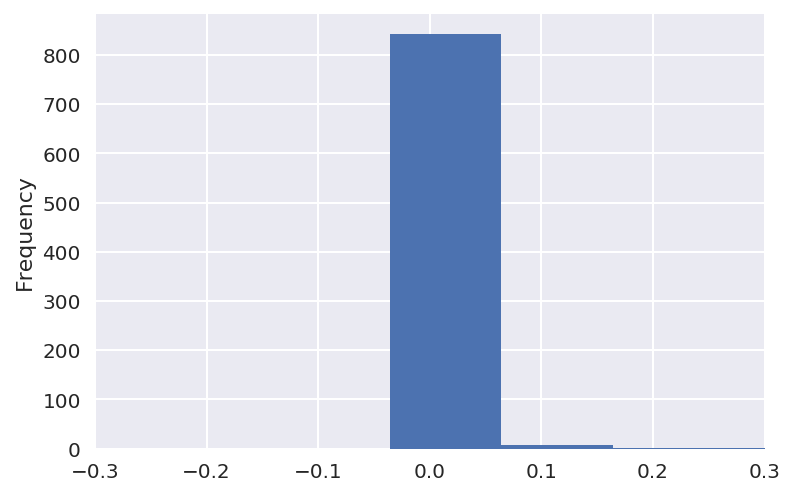

In [69]:
relative_opioids_per_practice.plot(kind='hist', xlim=(-0.3, 0.3))

In [70]:
standard_error_per_practice = np.sqrt(scripts[
    'opioids'].var() / scripts[
    'practice'].value_counts())
standard_error_per_practice.head()


N83028    0.003484
L83100    0.003513
D81043    0.003747
B81008    0.003796
B81026    0.003835
Name: practice, dtype: float64

In [71]:
opioid_scores = relative_opioids_per_practice / standard_error_per_practice
opioid_scores.head()

A81005   -0.548306
A81007    1.544557
A81011    2.291795
A81012    1.373060
A81017    0.583168
dtype: float64

In [72]:
top_opioids = opioid_scores.sort_values(ascending=False)[:100]
top_opioids.head()

Y01852    11.695818
Y03006     7.339043
Y03668     6.150582
G81703     5.123032
Y04997     4.958866
dtype: float64

In [73]:
top_opioids.rename('z_score').head()

Y01852    11.695818
Y03006     7.339043
Y03668     6.150582
G81703     5.123032
Y04997     4.958866
Name: z_score, dtype: float64

In [74]:
top_opioids = pd.DataFrame(top_opioids.rename('z_score')).reset_index()
top_opioids.columns = ['practice', 'z_score']
top_opioids.head()

,practice,z_score
0,Y01852,11.695818
1,Y03006,7.339043
2,Y03668,6.150582
3,G81703,5.123032
4,Y04997,4.958866


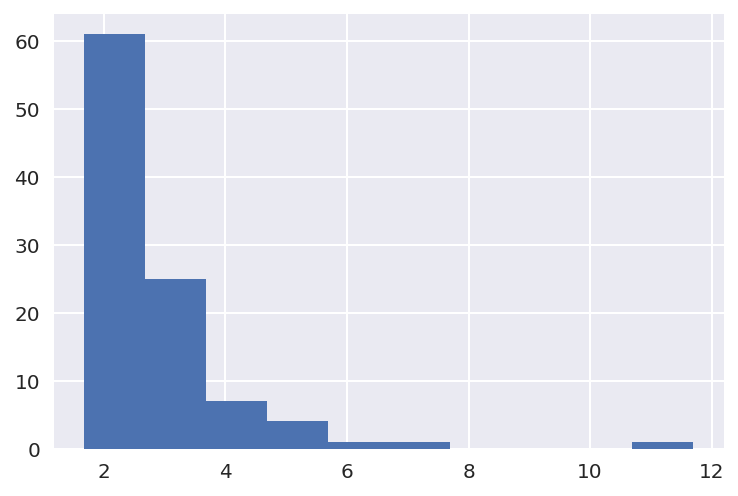

In [75]:
top_opioids.z_score.hist()

In [76]:
# groupby code, select the name and pick the alphabetically first name; e.g min('a', 'b') return a
unique_practices = practices.groupby('code')['name'].min()
unique_practices = pd.DataFrame(unique_practices)

In [77]:
unique_practices.head()

,name
code,
A81001,THE DENSHAM SURGERY
A81002,QUEENS PARK MEDICAL CENTRE
A81003,VICTORIA MEDICAL PRACTICE
A81004,BLUEBELL MEDICAL CENTRE
A81005,SPRINGWOOD SURGERY


In [78]:
top_opioids.head()

,practice,z_score
0,Y01852,11.695818
1,Y03006,7.339043
2,Y03668,6.150582
3,G81703,5.123032
4,Y04997,4.958866


In [79]:
# merge unique practices with top opioids in the know that practice 
# in top_opioids corresponds with index code of unique practices
results = top_opioids.merge(unique_practices,
                           how='left',
                           left_on='practice',
                           right_index=True)
results.head()

,practice,z_score,name
0,Y01852,11.695818,NATIONAL ENHANCED SERVICE
1,Y03006,7.339043,OUTREACH SERVICE NH / RH
2,Y03668,6.150582,BRISDOC HEALTHCARE SERVICES OOH
3,G81703,5.123032,H&R P C SPECIAL SCHEME
4,Y04997,4.958866,HMR BARDOC OOH


In [80]:
results = results.merge(pd.DataFrame(scripts.groupby('practice').size().rename('n_scripts')),
                        how='left',
                        left_on='practice',
                        right_index=True)
results.head()

,practice,z_score,name,n_scripts
0,Y01852,11.695818,NATIONAL ENHANCED SERVICE,7
1,Y03006,7.339043,OUTREACH SERVICE NH / RH,2
2,Y03668,6.150582,BRISDOC HEALTHCARE SERVICES OOH,60
3,G81703,5.123032,H&R P C SPECIAL SCHEME,36
4,Y04997,4.958866,HMR BARDOC OOH,321


In [81]:
results = results[['name', 'z_score', 'n_scripts']]

results.head()

,name,z_score,n_scripts
0,NATIONAL ENHANCED SERVICE,11.695818,7
1,OUTREACH SERVICE NH / RH,7.339043,2
2,BRISDOC HEALTHCARE SERVICES OOH,6.150582,60
3,H&R P C SPECIAL SCHEME,5.123032,36
4,HMR BARDOC OOH,4.958866,321


In [82]:
results['z_score'] = np.round(results['z_score'], 10)

In [83]:
anomalies = [tuple(row) for row in results.values]
anomalies[:5]

[('NATIONAL ENHANCED SERVICE', 11.6958178629, 7),
 ('OUTREACH SERVICE NH / RH', 7.3390430192, 2),
 ('BRISDOC HEALTHCARE SERVICES OOH', 6.1505817491, 60),
 ('H&R P C SPECIAL SCHEME', 5.123032414, 36),
 ('HMR BARDOC OOH', 4.9588664385, 321)]

In [84]:
grader.score.dw__script_anomalies(anomalies)

Your score:  1.0


## Question 5: script_growth

Another way to identify anomalies is by comparing current data to historical data. In the case of identifying sites of drug abuse, we might compare a practice's current rate of opioid prescription to their rate 5 or 10 years ago. Unless the nature of the practice has changed, the profile of drugs they prescribe should be relatively stable. We might also want to identify trends through time for business reasons, identifying drugs that are gaining market share. That's what we'll do in this question.

We'll load in beneficiary data from 6 months earlier, June 2016, and calculate the percent growth in prescription rate from June 2016 to January 2017 for each `bnf_name`. We'll return the 50 items with largest growth and the 50 items with the largest shrinkage (i.e. negative percent growth) as a list of tuples sorted by growth rate in descending order in the format `(script_name, growth_rate, raw_2016_count)`. You'll notice that many of the 50 fastest growing items have low counts of prescriptions in 2016. Filter out any items that were prescribed less than 50 times.

In [87]:
!ls dw-data

201606scripts_sample.csv.gz  chem.csv.gz
201701scripts_sample.csv.gz  practices.csv.gz


In [88]:
scripts16 = pd.read_csv('dw-data/201606scripts_sample.csv.gz')
scripts16.head()

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity
0,N85638,0301011R0,Salamol_Inha 100mcg (200 D) CFF (Teva),2,2.92,2.73,2
1,N85638,0301011R0,Easyhaler_Salbutamol Sulf 200mcg (200D),1,6.63,6.15,1
2,N85638,0301020I0,Ipratrop Brom_Inh Soln 500mcg/2ml Ud,1,1.77,1.75,12
3,N85638,0301020I0,Ipratrop Brom_Inh Soln 250mcg/1ml Ud,1,4.47,4.15,20
4,N85638,0302000C0,Clenil Modulite_Inha 50mcg (200D),1,3.70,3.44,1


In [91]:
scripts16.bnf_name.value_counts().astype(float).head()

GlucoRX FinePoint Needles Pen Inj Screw     1532.0
3m Health Care_Cavilon Durable Barrier C     825.0
Fluclox Sod_Cap 500mg                        796.0
Amoxicillin_Cap 500mg                        790.0
Prednisolone_Tab 5mg                         786.0
Name: bnf_name, dtype: float64

In [92]:
scripts.bnf_name.value_counts().astype(float).head()

GlucoRX FinePoint Needles Pen Inj Screw     1718.0
3m Health Care_Cavilon Durable Barrier C     816.0
Prednisolone_Tab 5mg                         785.0
Fluclox Sod_Cap 500mg                        783.0
Amoxicillin_Cap 500mg                        777.0
Name: bnf_name, dtype: float64

In [93]:
pct_growth = (scripts.bnf_name.value_counts().astype(float)
              /scripts16.bnf_name.value_counts().astype(float)
              - 1)

In [95]:
top50 = pct_growth.sort_values(ascending=False).dropna()[:50]
top50.head()

Vensir XL_Cap 225mg                     92.000
Fludroxycortide_Tape 7.5cm x 20cm       52.000
Tamiflu_Cap 75mg                        43.000
Enstilar_Foam Aero 50mcg/0.5mg/g        27.125
Memantine HCl_Orodisper Tab 10mg S/F    27.000
Name: bnf_name, dtype: float64

In [100]:
bottom50 = pct_growth.sort_values().dropna()[:50]
bottom50.head()

Polyalc_Eye Dps 1.4%        -0.996324
Macrogol_Co Oral Pdr Sach   -0.971429
Benzoyl Per_Crm 5%          -0.960000
Climesse_Tab                -0.942029
Univer_Cap 180mg            -0.941176
Name: bnf_name, dtype: float64

In [102]:
top_growth = pd.concat([top50, bottom50])
top_growth

Polyalc_Eye Dps 1.4%                       -0.996324
Macrogol_Co Oral Pdr Sach                  -0.971429
Benzoyl Per_Crm 5%                         -0.960000
Climesse_Tab                               -0.942029
Univer_Cap 180mg                           -0.941176
Rimexolone_Eye Dps 10mg/ml                 -0.938776
Sunsense_Toddler Suncare Milk Spf 50+      -0.938776
Oxprenolol HCl_Tab 160mg M/R               -0.928571
Climaval_Tab 1mg                           -0.926471
Ovysmen_Tab                                -0.925373
Abilify_Tab 15mg                           -0.916667
Hydroxyzine HCl_Oral Soln 10mg/5ml         -0.914894
Orphenadrine HCl_Tab 50mg                  -0.911765
Vexol_Eye Dps 10mg/ml                      -0.911111
Acondro_Tab 0.03mg/3mg                     -0.909091
Binovum_Tab                                -0.909091
Levofloxacin_Eye Dps 5mg/ml 0.5ml Ud P/F   -0.909091
Climaval_Tab 2mg                           -0.901515
Triapin_Tab 5mg/5mg M/R                    -0.

In [105]:
growth = pd.concat([pct_growth.rename('pct_growth'),
                   scripts16.bnf_name.value_counts().rename('count')],
                   axis=1).dropna()

filter_growth = growth[growth['count'] >= 50].sort_values('pct_growth', ascending=False)
filter_growth.head()

,pct_growth,count
Butec_Transdermal Patch 5mcg/hr,3.467742,62.0
Butec_Transdermal Patch 10mcg/hr,3.000000,69.0
Fostair NEXThaler_Inh 200mcg/6mcg (120D),1.430233,86.0
Pneumococcal_Vac 0.5ml Vl (23 Valent),1.269430,193.0
Spiolto Respimat_Inha2.5/2.5mcg(60D)+Dev,1.269231,52.0


In [113]:
extreme_growth = pd.concat([filter_growth.head(50), filter_growth.tail(50)])
extreme_growth.head()

,pct_growth,count
Butec_Transdermal Patch 5mcg/hr,3.467742,62.0
Butec_Transdermal Patch 10mcg/hr,3.000000,69.0
Fostair NEXThaler_Inh 200mcg/6mcg (120D),1.430233,86.0
Pneumococcal_Vac 0.5ml Vl (23 Valent),1.269430,193.0
Spiolto Respimat_Inha2.5/2.5mcg(60D)+Dev,1.269231,52.0


In [125]:
# script_growth = [("Butec_Transdermal Patch 5mcg\/hr", 3.4677419355, 62.0)] * 100

script_growth = [tuple(row) for row in extreme_growth.values]
script_growth[:5]

[(3.467741935483871, 62.0),
 (3.0, 69.0),
 (1.4302325581395348, 86.0),
 (1.2694300518134716, 193.0),
 (1.2692307692307692, 52.0)]

In [126]:
# script_growth = [("Butec_Transdermal Patch 5mcg\/hr", 3.4677419355, 62.0)] * 100

script_growth = [tuple(row) for row in extreme_growth.reset_index().values]
script_growth[:5]

[('Butec_Transdermal Patch 5mcg/hr', 3.467741935483871, 62.0),
 ('Butec_Transdermal Patch 10mcg/hr', 3.0, 69.0),
 ('Fostair NEXThaler_Inh 200mcg/6mcg (120D)', 1.4302325581395348, 86.0),
 ('Pneumococcal_Vac 0.5ml Vl (23 Valent)', 1.2694300518134716, 193.0),
 ('Spiolto Respimat_Inha2.5/2.5mcg(60D)+Dev', 1.2692307692307692, 52.0)]

In [127]:
script_growth = [tuple(row) for row in extreme_growth.itertuples()]
script_growth[:5]

[('Butec_Transdermal Patch 5mcg/hr', 3.467741935483871, 62.0),
 ('Butec_Transdermal Patch 10mcg/hr', 3.0, 69.0),
 ('Fostair NEXThaler_Inh 200mcg/6mcg (120D)', 1.4302325581395348, 86.0),
 ('Pneumococcal_Vac 0.5ml Vl (23 Valent)', 1.2694300518134716, 193.0),
 ('Spiolto Respimat_Inha2.5/2.5mcg(60D)+Dev', 1.2692307692307692, 52.0)]

In [128]:
grader.score.dw__script_growth(script_growth)

Your score:  1.0


## Question 6: rare_scripts

Does a practice's prescription costs originate from routine care or from reliance on rarely prescribed treatments? Commonplace treatments can carry lower costs than rare treatments because of efficiencies in large-scale production. While some specialist practices can't help but avoid prescribing rare medicines because there are no alternatives, some practices may be prescribing a unnecessary amount of brand-name products when generics are available. Let's identify practices whose costs disproportionately originate from rarely prescribed items.

First we have to identify which `'bnf_code'` are rare. To do this, find the probability $p$ of a prescription having a particular `'bnf_code'` if the `'bnf_code'` was randomly chosen from the unique options in the beneficiary data. We will call a `'bnf_code'` rare if it is prescribed at a rate less than $0.1p$.

In [252]:
p = 1. / scripts['bnf_code'].nunique()  # probabilility of bnf_code being precribe
rates = scripts['bnf_code'].value_counts() / scripts['bnf_code'].count()
mask = rates < .1 * p
rare_codes = rates[mask].index


0.0005063291139240507

In [277]:
scripts['rare'] = scripts['bnf_code'].isin(rare_codes)
scripts.head()

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,rare
0,N85639,0106020C0,Bisacodyl_Tab E/C 5mg,1,0.39,0.47,12,False
1,N85639,0106040M0,Movicol Plain_Paed Pdr Sach 6.9g,1,4.38,4.07,30,False
2,N85639,0301011R0,Salbutamol_Inha 100mcg (200 D) CFF,1,1.50,1.40,1,False
3,N85639,0304010G0,Chlorphenamine Mal_Oral Soln 2mg/5ml,1,2.62,2.44,150,False
4,N85639,0401020K0,Diazepam_Tab 2mg,1,0.16,0.26,6,False


Now for each practice, calculate the proportion of costs that originate from prescription of rare treatments (i.e. rare `'bnf_code'`). Use the `'act_cost'` field for this calculation.

In [258]:
rare_cost_prop = (scripts[scripts['rare']].groupby('practice')['act_cost'].sum() 
                  / scripts.groupby('practice')['act_cost'].sum()).fillna(0)

rare_cost_prop.head()

practice
A81005    0.012017
A81007    0.008381
A81011    0.005116
A81012    0.013747
A81017    0.007359
Name: act_cost, dtype: float64

Now we will calculate a z-score for each practice based on this proportion.
First take the difference of `rare_cost_prop` and the proportion of costs originating from rare treatments across all practices.

In [278]:
relative_rare_cost_prop = (rare_cost_prop
                          - scripts[scripts['rare']]['act_cost'].sum() 
                           / scripts['act_cost'].sum())

relative_rare_cost_prop.head()


practice
A81005   -0.003946
A81007   -0.007582
A81011   -0.010847
A81012   -0.002216
A81017   -0.008604
Name: act_cost, dtype: float64

Now we will estimate the standard errors (i.e. the denominator of the z-score) by simply taking the standard deviation of this difference.

In [261]:
standard_errors = relative_rare_cost_prop.std()
standard_errors

0.06050888706745139

Finally compute the z-scores. Return the practices with the top 100 z-scores in the form `(post_code, practice_name, z-score)`. Note that some practice codes will correspond with multiple names. In this case, use the first match when sorting names alphabetically.

In [262]:
rare_scores = (relative_rare_cost_prop / standard_errors).reset_index()
rare_scores.head()

,practice,act_cost
0,A81005,-0.065216
1,A81007,-0.125308
2,A81011,-0.179263
3,A81012,-0.036615
4,A81017,-0.142190


In [263]:
unique_practices = practices.groupby('code')['name'].min()


In [272]:
rare_scores['practice_name'] = \
rare_scores['practice'].apply(lambda code: unique_practices[code])
rare_scores.head()

,practice,practice_name,act_cost
765,Y03472,CONSULTANT DIABETES TEAM,16.262687
831,Y05320,DMC COMMUNITY DERMATOLOGY RBWF,15.128648
793,Y04404,OUTPATIENTS JUBILEE HEALTH CENTRE,7.542139
766,Y03484,DMC COMMUNITY DERMATOLOGY CLINIC,7.287222
794,Y04424,DMC HEALTHCARE,6.838614


In [269]:
rare_scores = rare_scores[['practice', 'practice_name', 'act_cost']]
rare_scores.sort_values('act_cost', ascending=False, inplace=True)

In [273]:
# rare_scripts = [("Y03472", "CONSULTANT DIABETES TEAM", 16.2626871247)] * 100
rare_scripts = [tuple(x) for x in rare_scores.values][:100]
rare_scripts[:5]

[('Y03472', 'CONSULTANT DIABETES TEAM', 16.262687124655073),
 ('Y05320', 'DMC COMMUNITY DERMATOLOGY RBWF', 15.128648195416869),
 ('Y04404', 'OUTPATIENTS JUBILEE HEALTH CENTRE', 7.54213935610462),
 ('Y03484', 'DMC COMMUNITY DERMATOLOGY CLINIC', 7.287222200297828),
 ('Y04424', 'DMC HEALTHCARE', 6.838614181432866)]

In [276]:
grader.score.dw__rare_scripts(rare_scripts)

Your score:  1.0


*Copyright &copy; 2019 The Data Incubator.  All rights reserved.*